In [57]:
#Problem 1:
#There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance

#Problem 2:
#How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.4

#Problem 3:
#Identify which all stocks are moving together and which all stocks are different from each other.

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
dataset=pd.read_csv("D:\Study\DataScience\DataSets\data_stocks.csv")

In [60]:
dataset.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [62]:
dataset.shape

(41266, 502)

In [63]:
dataset.get_dtype_counts()

float64    501
int64        1
dtype: int64

In [64]:

# Check if there are any null values. Since there are many columns, total sum of rows or elements which are null 
# across all columns tells us whether we need to consider to impute or remove those rows
dataset.isna().sum().sum()

0

In [65]:
# Check if there are any 0 values. Since there are many columns, total sum of rows or elements which have '0' values 
# across all columns tells us whether we need to consider to impute or clean/correct the data in those rows or elements
dataset[dataset==0].any().sum()

0

In [66]:
# Check if there are any -ve values. Since there are many columns, total sum of rows or elements which have '-ve' values 
# across all columns tells us whether we need to consider to impute or clean/correct the data in those rows or elements
dataset[dataset<0].any().sum()

0

In [67]:
dataset.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [68]:
X = dataset.iloc[:, 1:].values
stock_pricedataset= dataset.iloc[:, 1:]

In [69]:
stock_pricedataset

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2363.6101,42.3300,143.6800,129.6300,82.0400,102.2300,85.2200,59.7600,121.5200,38.9900,...,84.3700,119.0350,44.400,39.8800,82.0300,7.3600,50.2200,63.8600,122.0000,53.3500
1,2364.1001,42.3600,143.7000,130.3200,82.0800,102.1400,85.6500,59.8400,121.4800,39.0100,...,84.3700,119.0350,44.110,39.8800,82.0300,7.3800,50.2200,63.7400,121.7700,53.3500
2,2362.6799,42.3100,143.6901,130.2250,82.0300,102.2125,85.5100,59.7950,121.9300,38.9100,...,84.5850,119.2600,44.090,39.9800,82.0200,7.3600,50.1200,63.7500,121.7000,53.3650
3,2364.3101,42.3700,143.6400,130.0729,82.0000,102.1400,85.4872,59.6200,121.4400,38.8400,...,84.4600,119.2600,44.250,39.9900,82.0200,7.3500,50.1600,63.8800,121.7000,53.3800
4,2364.8501,42.5378,143.6600,129.8800,82.0350,102.0600,85.7001,59.6200,121.6000,38.9300,...,84.4700,119.6100,44.110,39.9600,82.0300,7.3600,50.2000,63.9100,121.6950,53.2400
5,2365.6201,42.5399,143.7800,130.0700,82.0400,102.0400,85.9200,59.6100,121.7000,38.9500,...,84.4825,119.5800,44.150,39.9600,82.0300,7.3600,50.2000,63.8400,121.8500,53.2200
6,2365.2000,42.4700,143.8640,130.1800,82.1200,102.3300,85.9120,59.5400,121.6300,38.9600,...,84.5000,119.3200,44.200,39.9800,82.0566,7.3650,50.3300,63.8300,122.1000,53.3300
7,2365.2900,42.4700,143.8100,130.1400,82.1900,102.3700,85.8200,59.4100,121.6100,38.9600,...,84.5200,119.1100,44.120,39.9500,82.0000,7.3600,50.3000,63.8300,122.2800,53.3700
8,2364.3201,42.3900,143.8150,130.1000,82.2300,102.3800,85.8800,59.4300,121.7150,38.9125,...,84.4800,119.3100,44.120,39.9300,81.9500,7.3700,50.2500,63.8500,121.8750,53.3300
9,2364.6399,42.3300,143.8000,130.2100,82.1650,102.3300,85.8600,59.2600,121.8500,38.8900,...,84.4000,119.1500,44.170,39.8600,81.9000,7.3650,50.2200,63.8400,121.9300,53.4000


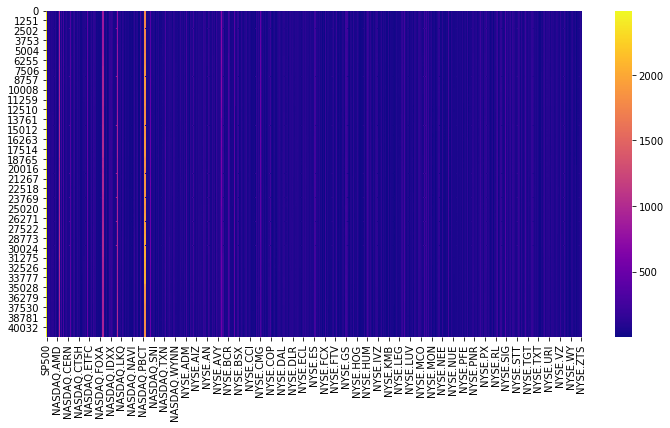

In [70]:
plt.figure(figsize=(12,6))

sns.heatmap(stock_pricedataset,cmap='plasma')
plt.show()

In [71]:
# Calculate average annual percentage return and volatilities over the time period of the data in the dataset
performance = stock_pricedataset.pct_change().mean() * 128

performance = pd.DataFrame(performance)

performance.columns = ['Performance']

In [72]:
from math import sqrt
performance['Volatility'] = stock_pricedataset.pct_change().std() * sqrt(128)

In [73]:
from scipy.cluster.vq import vq
data = np.asarray([np.asarray(performance['Performance']),np.asarray(performance['Volatility'])]).T

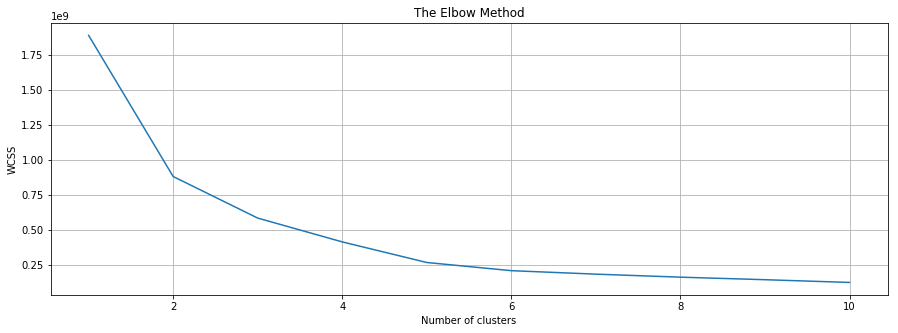

In [74]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
# Within cluster sum of square or SSE
wcss = []
for k in range(1, 11):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
    
fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 11), wcss)
plt.grid(True)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

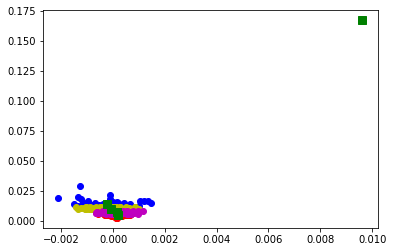

In [47]:
X=data
from scipy.cluster.vq import kmeans,vq
# computing K-Means with K = 6 (6 clusters)
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)



# some plotting using numpy's logical indexing
plt.plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om',
     data[idx==5,0],data[idx==5,1],'oc')

plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8)


In [48]:
#identify the outlier
print(performance.idxmax())

Performance    NYSE.XRX
Volatility     NYSE.XRX
dtype: object


In [49]:
#drop the relevant stock from our data
performance.drop('NYSE.XRX',inplace=True)

#recreate data to feed into the algorithm
data = np.asarray([np.asarray(performance['Performance']),np.asarray(performance['Volatility'])]).T

In [50]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

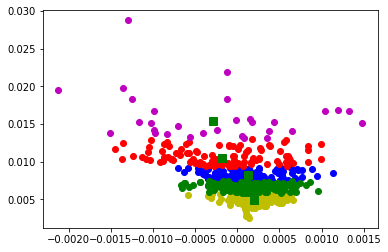

In [52]:
from scipy.cluster.vq import kmeans,vq
# computing K-Means with K = 5(5 clusters)
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plt.plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om',
     data[idx==5,0],data[idx==5,1],'oc')

plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8)

#### Problem 1: There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance?

In [53]:
similarperformance_stocks = [(name,cluster) for name, cluster in zip(performance.index.values,idx)]
similarperformance_stocks

[('SP500', 1),
 ('NASDAQ.AAL', 2),
 ('NASDAQ.AAPL', 3),
 ('NASDAQ.ADBE', 3),
 ('NASDAQ.ADI', 0),
 ('NASDAQ.ADP', 0),
 ('NASDAQ.ADSK', 2),
 ('NASDAQ.AKAM', 2),
 ('NASDAQ.ALXN', 2),
 ('NASDAQ.AMAT', 2),
 ('NASDAQ.AMD', 4),
 ('NASDAQ.AMGN', 3),
 ('NASDAQ.AMZN', 0),
 ('NASDAQ.ATVI', 0),
 ('NASDAQ.AVGO', 0),
 ('NASDAQ.BBBY', 2),
 ('NASDAQ.BIIB', 0),
 ('NASDAQ.CA', 2),
 ('NASDAQ.CBOE', 3),
 ('NASDAQ.CELG', 3),
 ('NASDAQ.CERN', 3),
 ('NASDAQ.CHRW', 0),
 ('NASDAQ.CHTR', 2),
 ('NASDAQ.CINF', 3),
 ('NASDAQ.CMCSA', 3),
 ('NASDAQ.CME', 3),
 ('NASDAQ.COST', 3),
 ('NASDAQ.CSCO', 3),
 ('NASDAQ.CSX', 0),
 ('NASDAQ.CTAS', 3),
 ('NASDAQ.CTSH', 1),
 ('NASDAQ.CTXS', 0),
 ('NASDAQ.DISCA', 2),
 ('NASDAQ.DISCK', 2),
 ('NASDAQ.DISH', 2),
 ('NASDAQ.DLTR', 2),
 ('NASDAQ.EA', 2),
 ('NASDAQ.EBAY', 0),
 ('NASDAQ.EQIX', 0),
 ('NASDAQ.ESRX', 2),
 ('NASDAQ.ETFC', 0),
 ('NASDAQ.EXPD', 3),
 ('NASDAQ.EXPE', 0),
 ('NASDAQ.FAST', 2),
 ('NASDAQ.FB', 3),
 ('NASDAQ.FFIV', 2),
 ('NASDAQ.FISV', 1),
 ('NASDAQ.FITB', 0),
 ('NASD

### Problem 2:
#### How many Unique patterns that exist in the historical stock data set, based on fluctuations in price

#### as per the above ,number of unique patterns are 5

#### Problem 3: Identify which all stocks are moving together and which all stocks are different from each other?

In [54]:
movingTogether_Stocks=[(name,cluster) for name, cluster in zip(performance.index.values,idx)]
movingTogether_Stocks

[('SP500', 1),
 ('NASDAQ.AAL', 2),
 ('NASDAQ.AAPL', 3),
 ('NASDAQ.ADBE', 3),
 ('NASDAQ.ADI', 0),
 ('NASDAQ.ADP', 0),
 ('NASDAQ.ADSK', 2),
 ('NASDAQ.AKAM', 2),
 ('NASDAQ.ALXN', 2),
 ('NASDAQ.AMAT', 2),
 ('NASDAQ.AMD', 4),
 ('NASDAQ.AMGN', 3),
 ('NASDAQ.AMZN', 0),
 ('NASDAQ.ATVI', 0),
 ('NASDAQ.AVGO', 0),
 ('NASDAQ.BBBY', 2),
 ('NASDAQ.BIIB', 0),
 ('NASDAQ.CA', 2),
 ('NASDAQ.CBOE', 3),
 ('NASDAQ.CELG', 3),
 ('NASDAQ.CERN', 3),
 ('NASDAQ.CHRW', 0),
 ('NASDAQ.CHTR', 2),
 ('NASDAQ.CINF', 3),
 ('NASDAQ.CMCSA', 3),
 ('NASDAQ.CME', 3),
 ('NASDAQ.COST', 3),
 ('NASDAQ.CSCO', 3),
 ('NASDAQ.CSX', 0),
 ('NASDAQ.CTAS', 3),
 ('NASDAQ.CTSH', 1),
 ('NASDAQ.CTXS', 0),
 ('NASDAQ.DISCA', 2),
 ('NASDAQ.DISCK', 2),
 ('NASDAQ.DISH', 2),
 ('NASDAQ.DLTR', 2),
 ('NASDAQ.EA', 2),
 ('NASDAQ.EBAY', 0),
 ('NASDAQ.EQIX', 0),
 ('NASDAQ.ESRX', 2),
 ('NASDAQ.ETFC', 0),
 ('NASDAQ.EXPD', 3),
 ('NASDAQ.EXPE', 0),
 ('NASDAQ.FAST', 2),
 ('NASDAQ.FB', 3),
 ('NASDAQ.FFIV', 2),
 ('NASDAQ.FISV', 1),
 ('NASDAQ.FITB', 0),
 ('NASD